In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fifa = pd.read_csv(r'/content/drive/MyDrive/Udacity/fifa19/data.csv',index_col=0)

In [3]:
fifa.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12442,182112,V. Lia,33,https://cdn.sofifa.org/players/4/19/182112.png,Australia,https://cdn.sofifa.org/flags/195.png,63,63,Adelaide United,https://cdn.sofifa.org/teams/2/light/111393.png,€150K,€1K,1653,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CDM,6.0,"Aug 3, 2017",NaN,2019,5'10,161lbs,54+2,54+2,54+2,53+2,54+2,54+2,54+2,53+2,56+2,56+2,56+2,54+2,59+2,...,57+2,61+2,61+2,61+2,57+2,52.0,46.0,58.0,61.0,34.0,49.0,40.0,44.0,62.0,58.0,43.0,46.0,63.0,57.0,60.0,64.0,74.0,80.0,78.0,66.0,75.0,58.0,50.0,63.0,48.0,61.0,60.0,60.0,54.0,16.0,7.0,14.0,7.0,6.0,€188K
10295,199002,M. Amini,25,https://cdn.sofifa.org/players/4/19/199002.png,Australia,https://cdn.sofifa.org/flags/195.png,65,70,Aarhus GF,https://cdn.sofifa.org/teams/2/light/271.png,€700K,€4K,1787,Right,1.0,4.0,3.0,Medium/ Medium,Stocky,No,CM,6.0,"Jun 23, 2016",NaN,2020,5'9,165lbs,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,65+2,65+2,65+2,63+2,64+2,...,58+2,58+2,58+2,58+2,58+2,52.0,55.0,48.0,68.0,56.0,66.0,44.0,43.0,65.0,67.0,67.0,61.0,80.0,58.0,80.0,69.0,74.0,72.0,69.0,61.0,66.0,55.0,63.0,67.0,45.0,61.0,59.0,54.0,51.0,15.0,15.0,16.0,16.0,10.0,€928K
13044,224763,K. Bielik,20,https://cdn.sofifa.org/players/4/19/224763.png,Poland,https://cdn.sofifa.org/flags/37.png,63,78,Charlton Athletic,https://cdn.sofifa.org/teams/2/light/89.png,€725K,€10K,1604,Right,1.0,3.0,2.0,Medium/ High,Lean,No,CB,4.0,NaN,Arsenal,"Jun 30, 2019",6'2,172lbs,53+2,53+2,53+2,55+2,55+2,55+2,55+2,55+2,58+2,58+2,58+2,56+2,60+2,...,58+2,62+2,62+2,62+2,58+2,49.0,33.0,57.0,65.0,46.0,61.0,48.0,43.0,60.0,66.0,49.0,50.0,59.0,55.0,46.0,57.0,52.0,60.0,75.0,47.0,71.0,61.0,53.0,66.0,42.0,55.0,62.0,61.0,60.0,15.0,7.0,12.0,8.0,8.0,NaN
2817,142942,J. Gandolfi,37,https://cdn.sofifa.org/players/4/19/142942.png,Argentina,https://cdn.sofifa.org/flags/52.png,73,73,Club Atlético Talleres,https://cdn.sofifa.org/teams/2/light/112670.png,€550K,€9K,1772,Right,1.0,2.0,2.0,Low/ Medium,Stocky,No,CB,3.0,"Jul 1, 2016",NaN,2019,5'10,172lbs,51+2,51+2,51+2,50+2,50+2,50+2,50+2,50+2,54+2,54+2,54+2,53+2,60+2,...,64+2,72+2,72+2,72+2,64+2,44.0,34.0,73.0,70.0,50.0,45.0,58.0,64.0,69.0,60.0,65.0,43.0,64.0,60.0,53.0,67.0,83.0,67.0,81.0,40.0,82.0,71.0,26.0,62.0,58.0,70.0,69.0,74.0,72.0,12.0,15.0,12.0,16.0,13.0,€825K
12142,169489,J. Byrom,31,https://cdn.sofifa.org/players/4/19/169489.png,England,https://cdn.sofifa.org/flags/14.png,63,63,Stevenage,https://cdn.sofifa.org/teams/2/light/361.png,€325K,€3K,1693,Left,1.0,3.0,2.0,Medium/ Medium,Normal,No,LCM,8.0,"Jul 1, 2018",NaN,2019,6'0,172lbs,56+2,56+2,56+2,57+2,57+2,57+2,57+2,57+2,59+2,59+2,59+2,58+2,62+2,...,55+2,55+2,55+2,55+2,55+2,63.0,52.0,49.0,66.0,50.0,54.0,65.0,65.0,64.0,62.0,44.0,39.0,66.0,59.0,61.0,62.0,77.0,68.0,71.0,62.0,54.0,55.0,59.0,66.0,64.0,59.0,40.0,57.0,55.0,12.0,7.0,10.0,9.0,6.0,€569K


In [4]:
# description of the dataset
fifa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [6]:
# duplicate rows in the dataset
fifa.duplicated().sum()

0

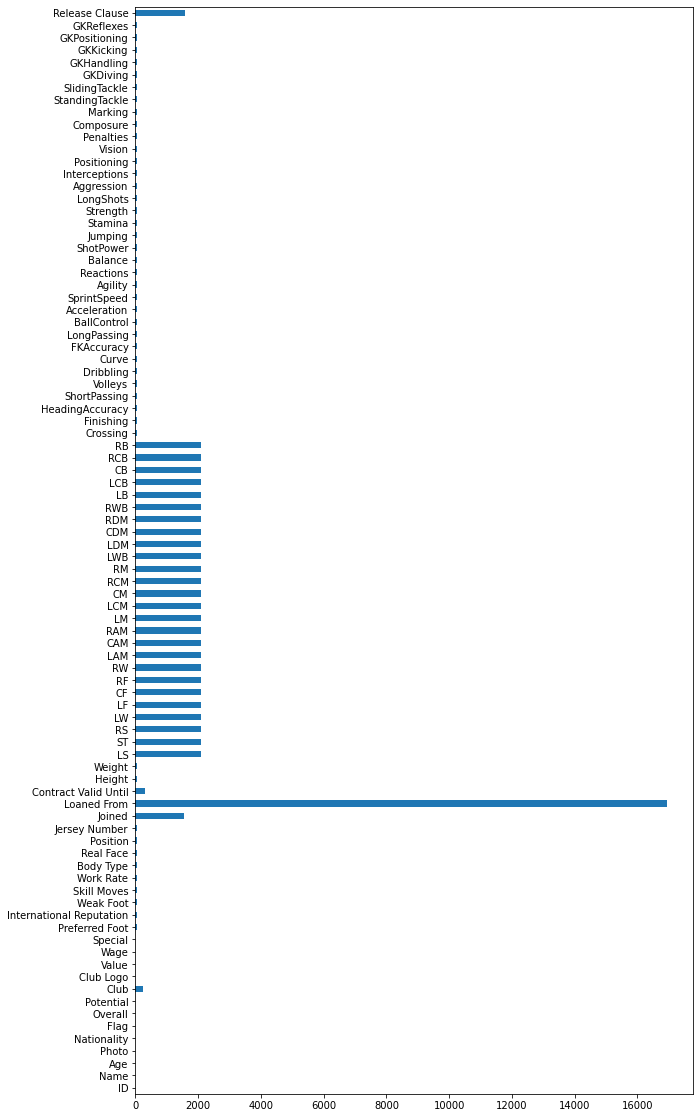

In [7]:
# features with missing values
fifa.isnull().sum().plot(kind='barh', figsize = (10,20));

In [8]:
fifa['Loaned From'].isnull().sum()

16943

In [9]:
fifa.drop('Loaned From',axis = 1 , inplace=True)

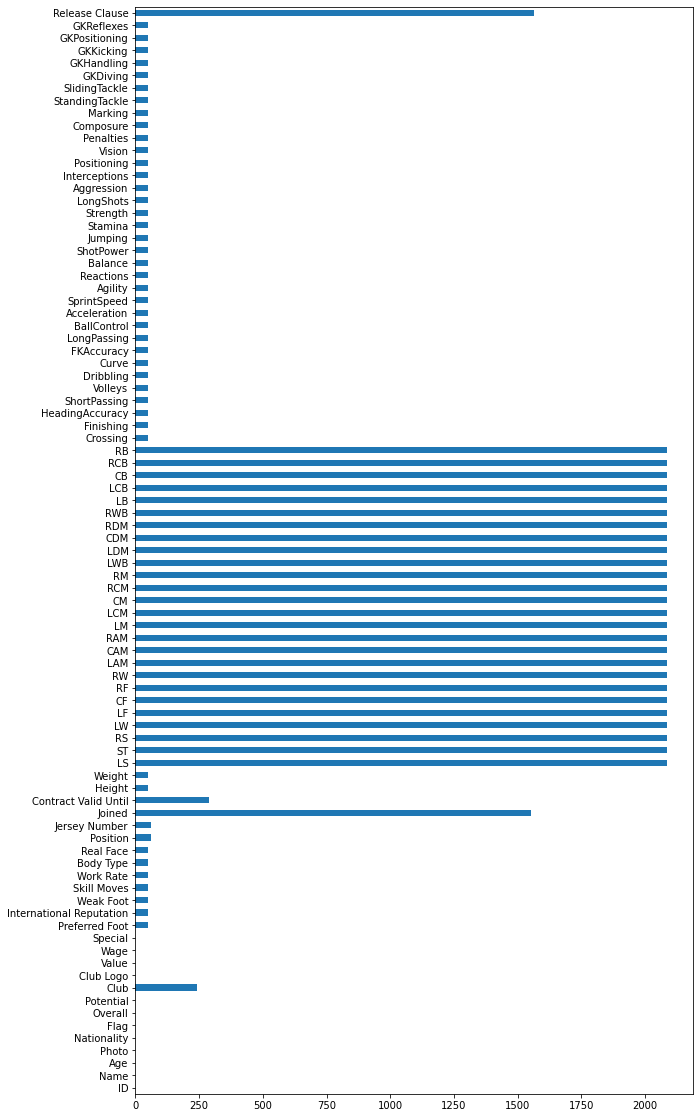

In [10]:
fifa.isnull().sum().plot(kind = 'barh', figsize = (10,20))

Questions:

1. Which Nationality has more players.
2. Which Ages are more common between players
3. The Average Overall Performing of All players
4. Relationship between Finishing and Dribbling 





# Which Ages are more common between players

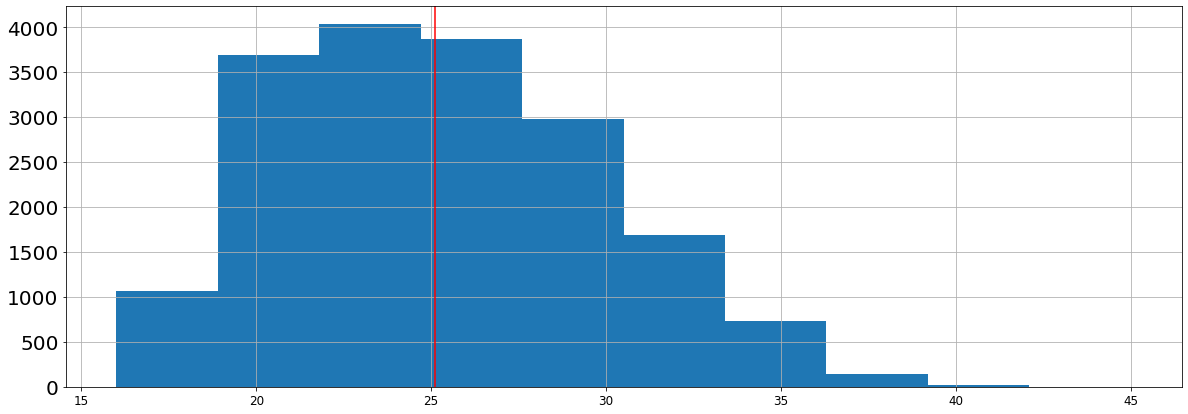

In [48]:
plt.figure(figsize=(20,7))
fifa.Age.hist()
plt.axvline(fifa.Age.mean(), color = 'r');

# Which Nationality has more players.

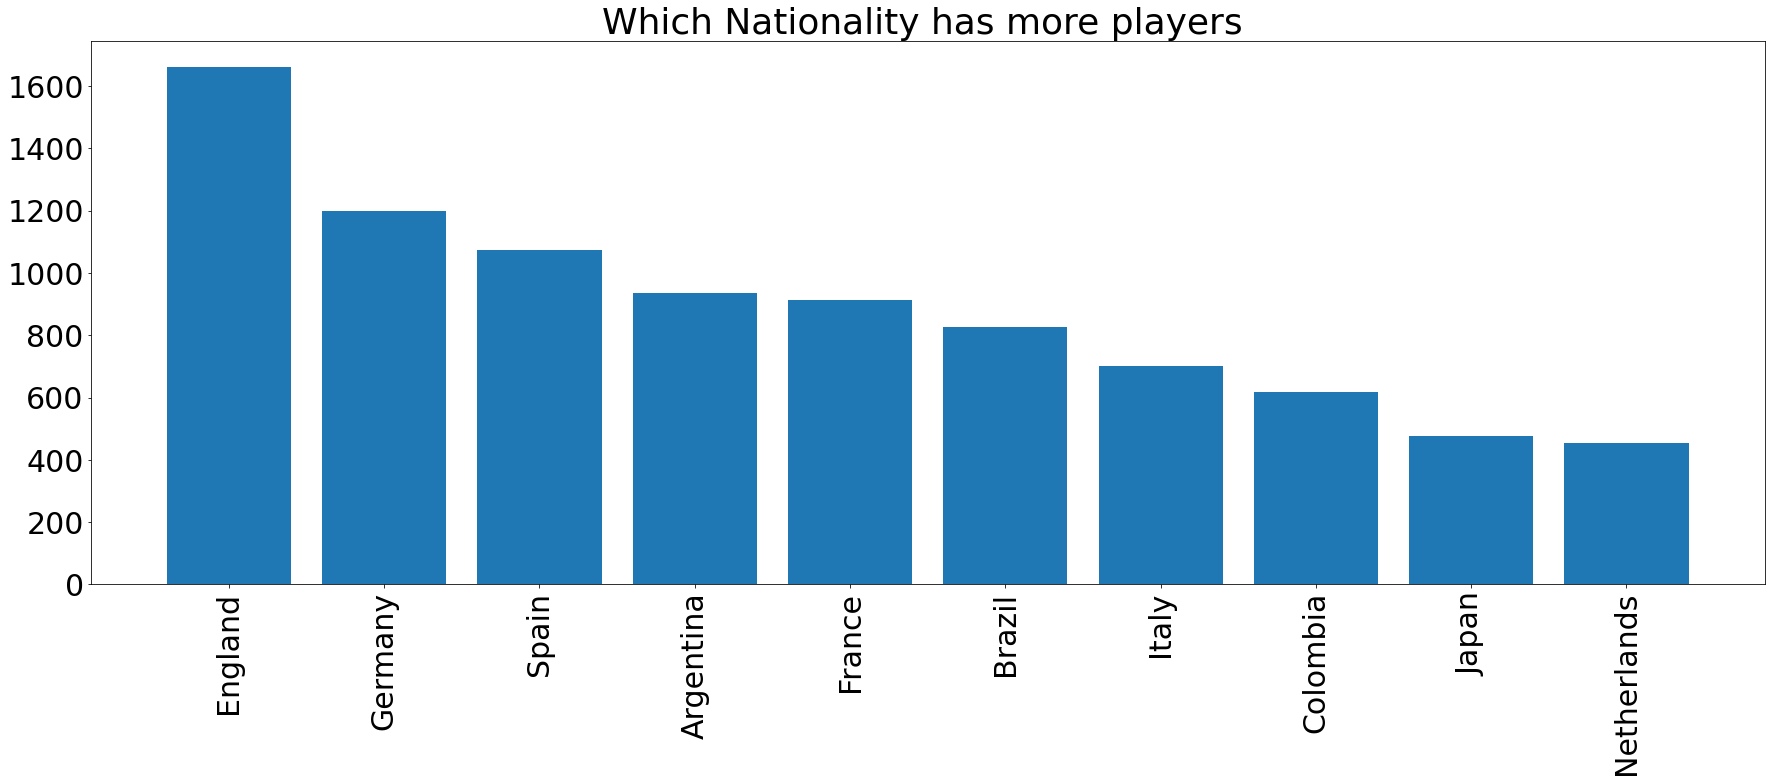

In [36]:
plt.figure(figsize=(30,10))
plt.bar(fifa.Nationality.value_counts().index[:10], fifa.Nationality.value_counts()[:10])
plt.xticks( rotation = 90)
plt.title('Which Nationality has more players ')
plt.rcParams.update({'font.size' : 20 })
plt.show();

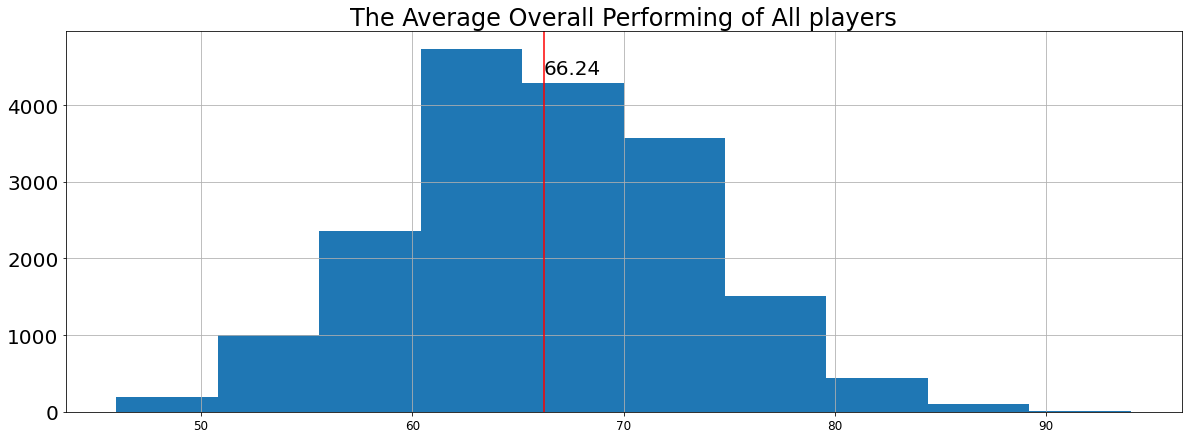

In [47]:
Avg = round(fifa.Overall.mean(), ndigits= 2)
plt.figure(figsize=(20,7))
fifa.Overall.hist()
plt.axvline(Avg, color = 'r')
plt.rc('xtick', labelsize = 12)
plt.text(Avg, 4400,s=Avg)
plt.title('The Average Overall Performing of All players');


# Relationship between Finishing and Dribbling

In [50]:
fifa.dropna(0, 'any', inplace=True)
fifa.shape

(14743, 87)

In [60]:
import statsmodels.api as sm
fifa['intercept'] = 1
sm.OLS(fifa['Dribbling'], fifa[['Finishing', 'intercept']]).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dribbling   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.471e+04
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:41:43   Log-Likelihood:                -53109.
No. Observations:               14743   AIC:                         1.062e+05
Df Residuals:                   14741   BIC:                         1.062e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Finishing      0.5426      0.004    121.291      0.000       0.534       0.551
intercept     33.5395      0.233    143.691      0.000      33.082      33.997
==============================================================================
Omnibus:                      432.149   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.859
Skew:                          -0.399   Prob(JB):                    1.91e-106
Kurtosis:                       3.393   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

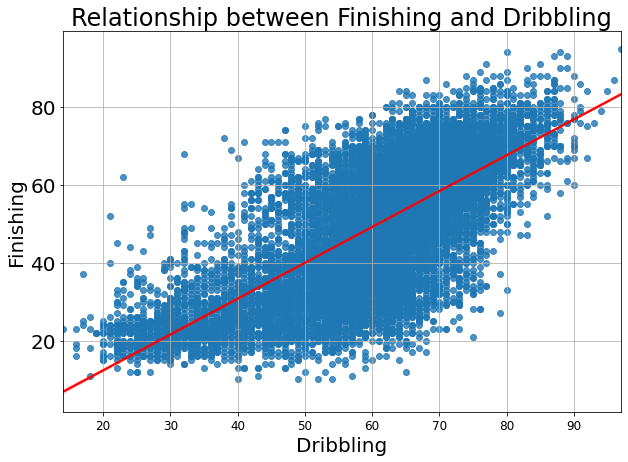

In [62]:

plt.figure(figsize=(10,7))
sns.regplot(data = fifa, x = 'Dribbling', y = 'Finishing', line_kws= {'color':'red'});
plt.xlabel('Dribbling')
plt.ylabel('Finishing')
plt.title('Relationship between Finishing and Dribbling')
#plt.abline(corr(fifa.Finishing, fifa.Dribbling))
plt.text(Avg, 4400,s=Avg)
plt.grid()
plt.show();
